<a href="https://colab.research.google.com/github/Adeelzafar/30-Days-of-ML-Kaggle/blob/main/LevelGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
!pip install mario-gpt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.5/984.5 KB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.5 MB/s eta 0:00:00


In [ ]:
from mario_gpt import MarioDataset, MarioLM
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize


In [ ]:


mario_lm = MarioLM()



Using shyamsn97/Mario-GPT2-700-context-length model


/usr/local/lib/python3.9/dist-packages/transformers/models/auto/modeling_auto.py:1295: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Using shyamsn97/Mario-GPT2-700-context-length tokenizer


In [ ]:
dataset = MarioDataset(mario_lm.tokenizer)

No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...


Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
view_level(dataset.input_ids[:700], mario_lm.tokenizer)

['--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '-------------------------------------------------o',
 '--------XSSSSS---------------------------------SSS',
 '--------X-----------------------------------------',
 '--------X-----------------------------------------',
 '-------EX--E-X---------------xxxx-?-----------xxxx',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?',
 '---------------------------xx-[]--x---------xx----',
 '--------------------------xx--[]---x-------xx-----',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXX']

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


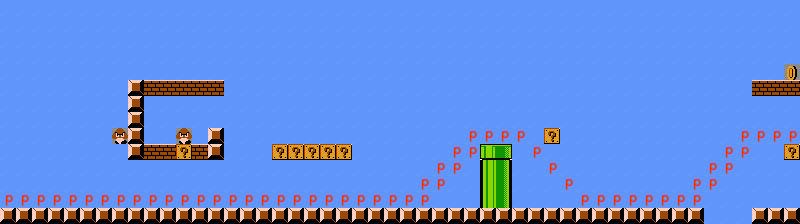

In [ ]:
img = convert_level_to_png(dataset.input_ids[:700],  mario_lm.tokenizer)[0]
img

In [ ]:
device = torch.device('cuda')
mario_lm = mario_lm.to(device)

In [ ]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]

In [ ]:
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)

shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100%|██████████| 1400/1400 [00:52<00:00, 26.75it/s]


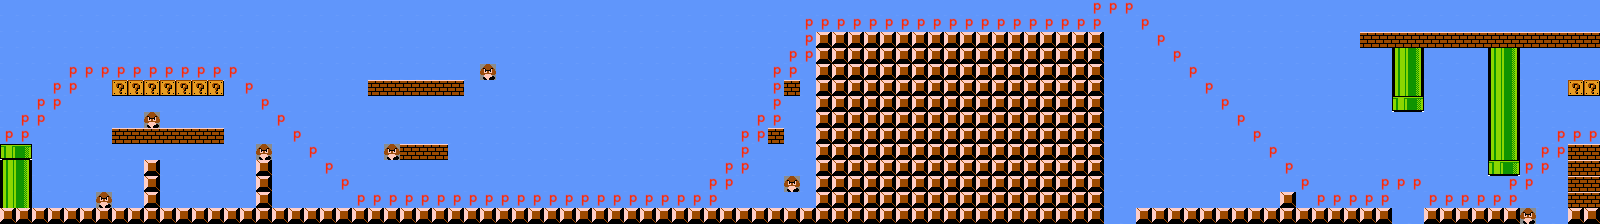

In [ ]:
generated_level.img

In [ ]:
generated_level.play()

Playing level interactively -- /tmp/tmphoik4x7r.txt!


In [ ]:
generated_level.run_astar()

Running Astar agent on level! -- /tmp/tmp_kmt22yu.txt
